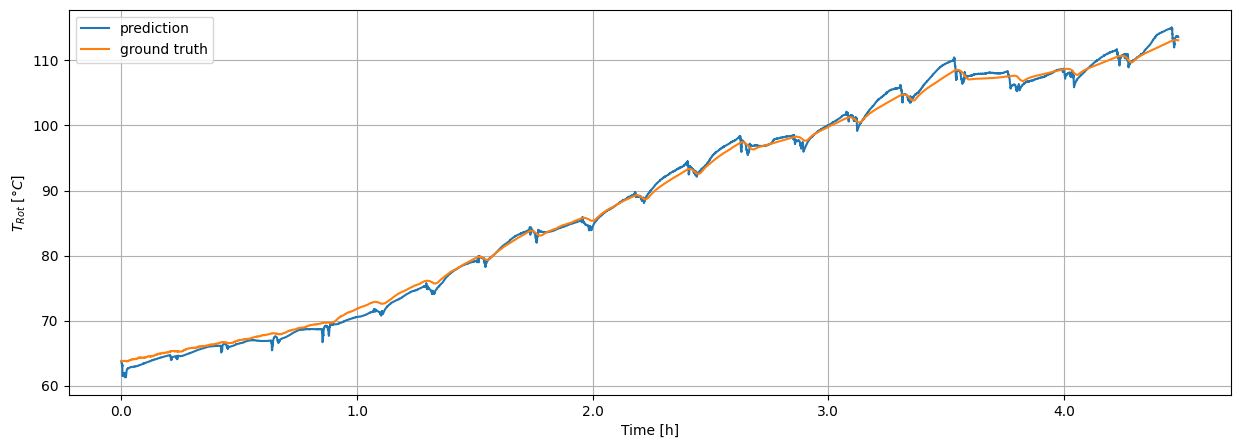

In [5]:
import pandas as pd
import sqlite3

# creating file path
dbfile ='data/results_lea38.db'

# Create a SQL connection to our SQLite database
conn = sqlite3.connect(dbfile)

# Define your SQL query
table_name = 'predictions'
# id = 'ea85a5'         # Paderborn Datensatz
# id = '3b6dcb'           # 3.19 K² MSE
# id = '21fa8e'         # Freitagslauf als Testdaten
# id = '103c4b'         # Freitagslauf als Testdaten
# id = 'ef8c85'         # Aus Hyperperameteroptimierung mit mse = 6.3K^2
# id = '9b9b33'           # Aus Hyperperameteroptimierung mit mse = 2.5K^2
id = 'e3eec3'           # Aus Hyperperameteroptimierung mit mse = 0.7K^2
query = "SELECT * FROM " + table_name + " WHERE id = '" + id + "'"

# Execute the query and store the results in a DataFrame
df = pd.read_sql_query(query, conn)

# Close the database connection
conn.close()
import matplotlib.pyplot as plt	

# Plot pm and pm_gtruth over time
fig, ax = plt.subplots()
ax.plot(df['idx'], df['pm'], label='prediction')
ax.plot(df['idx'], df['pm_gtruth'], label='ground truth')

ax.legend()
ax.grid(True)

# Add labels
ax.set_xlabel('Time [h]')
ax.set_ylabel('$T_{Rot}\ [°C]$')

# Scale
samplerate = int(2*60*60)
ticks = df['idx'][::samplerate]
ax.set_xticks(ticks)
ax.set_xticklabels(df['idx'][::samplerate]/samplerate)

plt.rcParams["figure.figsize"] = (15,5)
plt.show()
